# Autoregressive Model
- Before I place model in [main.ipynb](https://github.com/Brinkley97/applied_time_series_and_machine_learning/blob/main/play/main.ipynb)

# Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from matplotlib import pyplot

from statsmodels.tsa.ar_model import AutoReg

# test for stationarity
from statsmodels.tsa.stattools import adfuller

# partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf

import statsmodels.graphics.tsaplots as tsa

In [2]:
ticker_symbol = "VOO"
# symbol = "BRK-A"
start_date = "2022-01-01"
end_date = "2023-07-26"
voo_df = yf.download(ticker_symbol, start=start_date, end=end_date)
voo_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,437.929993,439.269989,435.640015,439.250000,428.554657,6017300
2022-01-04,440.579987,441.260010,437.220001,439.070007,428.379028,6262200
2022-01-05,438.779999,439.410004,430.529999,430.660004,420.173859,7539600
2022-01-06,430.200012,432.829987,427.899994,430.079987,419.607910,7971500
2022-01-07,430.209991,431.359985,427.200012,428.589996,418.154205,6157500
...,...,...,...,...,...,...
2023-07-19,418.070007,419.369995,417.489990,418.250000,418.250000,3494900
2023-07-20,417.299988,418.160004,414.820007,415.519989,415.519989,4085000
2023-07-21,417.109985,417.299988,415.480011,415.570007,415.570007,3175700


<AxesSubplot: xlabel='Date'>

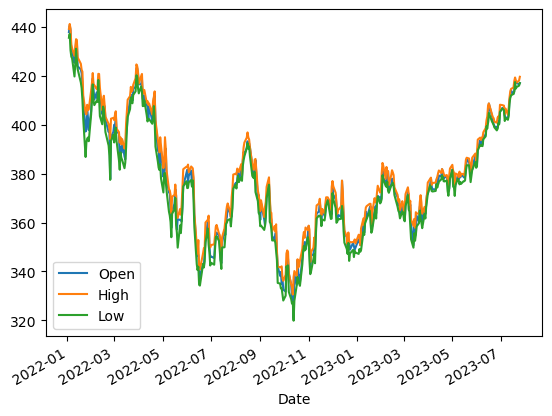

In [3]:
voo_df.loc[:, ['Open', 'High', 'Low']].plot()

<AxesSubplot: xlabel='Date'>

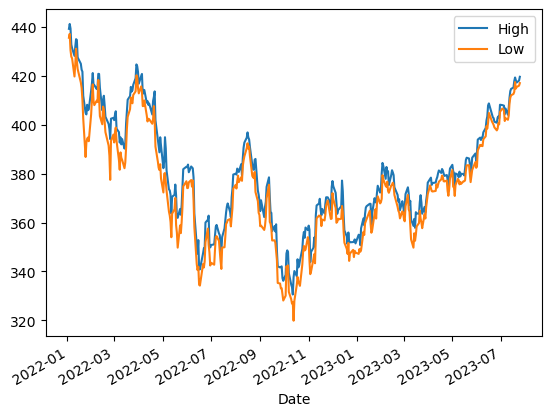

In [4]:
voo_df.loc[:, ['High', 'Low']].plot()

In [5]:
open_voo_df = voo_df['Open']
open_voo_df

Date
2022-01-03    437.929993
2022-01-04    440.579987
2022-01-05    438.779999
2022-01-06    430.200012
2022-01-07    430.209991
                 ...    
2023-07-19    418.070007
2023-07-20    417.299988
2023-07-21    417.109985
2023-07-24    416.579987
2023-07-25    417.079987
Name: Open, Length: 391, dtype: float64

<AxesSubplot: xlabel='Date'>

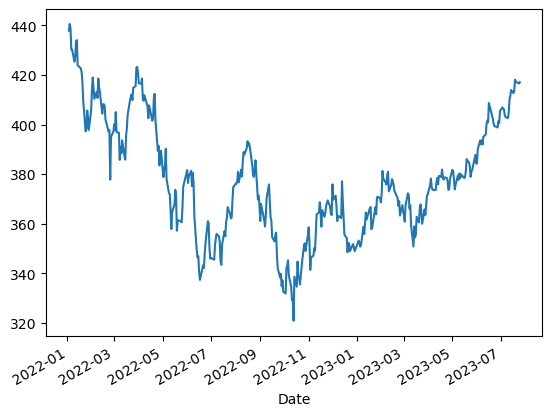

In [6]:
open_voo_df.plot()

# Check Stationarity
- [ ] Don't quite understand the `pvalue` from the Augmented Dickey-Fuller unit root test.

In [7]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(open_voo_df, autolag='AIC')
adf, pvalue, usedlag, nobs, critical_values, icbest

(-2.5529930364150584,
 0.10310695722632102,
 0,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 2258.553273255254)

# Plot Partial Autocorrelation
- ACor states at lag k, how much spread is there between the 1st observation and my kth observation.
- Here, there seems to be low ACor.
- [ ] What to do with this? 
- [ ] Does this mean our model prediction(s) will be off?

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


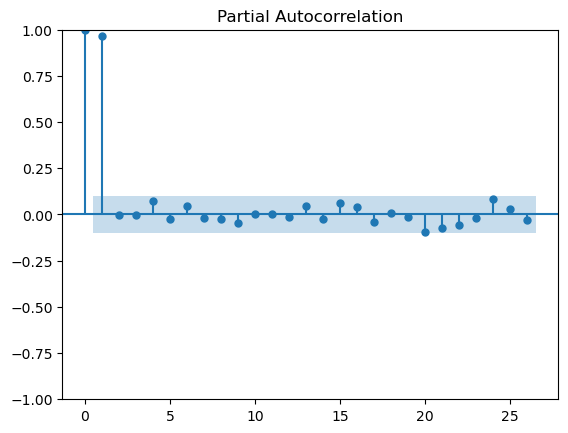

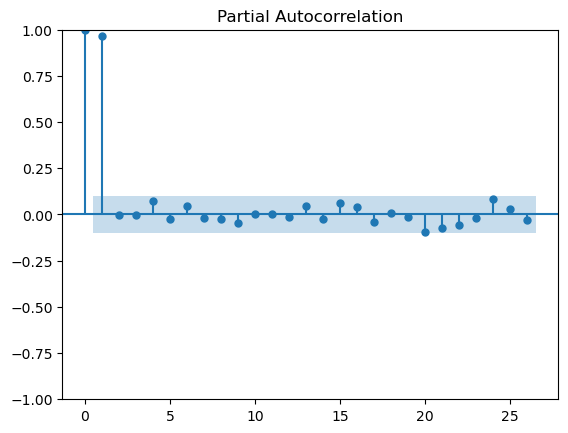

In [8]:
plot_pacf(open_voo_df)

# Split Data

In [9]:
N = len(open_voo_df)
N

391

In [10]:
split_data_at_length = N - 100
split_data_at_length

291

In [11]:
train_data = open_voo_df[0:split_data_at_length]
train_data

Date
2022-01-03    437.929993
2022-01-04    440.579987
2022-01-05    438.779999
2022-01-06    430.200012
2022-01-07    430.209991
                 ...    
2023-02-23    369.070007
2023-02-24    363.309998
2023-02-27    367.489990
2023-02-28    365.010010
2023-03-01    363.339996
Name: Open, Length: 291, dtype: float64

In [12]:
test_data = open_voo_df[split_data_at_length:]
test_data

Date
2023-03-02    360.809998
2023-03-03    367.290009
2023-03-06    372.260010
2023-03-07    371.630005
2023-03-08    366.109985
                 ...    
2023-07-19    418.070007
2023-07-20    417.299988
2023-07-21    417.109985
2023-07-24    416.579987
2023-07-25    417.079987
Name: Open, Length: 100, dtype: float64

# Create AR Model
- [ ] How to determine the proper lag value? 
    - Look at the Partial ACor plot. Being that no correlation exists after 2, we'll stop at 2 (where there still exists some correlation)
- [ ] How to understand the model summary?

In [13]:
ar_model = AutoReg(train_data, lags=2)
ar_model

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
train_ar_model = ar_model.fit()
train_ar_model

In [15]:
train_ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   Open   No. Observations:                  291
Model:                     AutoReg(2)   Log Likelihood                -898.503
Method:               Conditional MLE   S.D. of innovations              5.420
Date:                Tue, 26 Sep 2023   AIC                           1805.006
Time:                        18:44:06   BIC                           1819.671
Sample:                             2   HQIC                          1810.882
                                  291                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9704      4.788      2.709      0.007       3.586      22.354
Open.L1        0.9383      0.059     15.978      0.000       0.823       1.053
Open.L2        0.0264      0.058      0.454      0.650      -0.087       0.140
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0356           +0.0000j            1.0356            0.0000
AR.2          -36.5955           +0.0000j           36.5955            0.5000
-----------------------------------------------------------------------------
"""

# Make predictions
- Start making predictions at the split observation and go to the n-1 observation. A simplier example is with [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. Say we split at 7. historical_data would start at 7. We will make predictions for 8, 9. What about 10?

In [16]:
historical_data = len(train_data)
historical_data

291

In [17]:
tomorrow = len(open_voo_df) - 1
tomorrow

390

In [18]:
pred = train_ar_model.predict(start=historical_data, end=tomorrow, dynamic=False)
pred

/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/brinkley97/opt/anaconda3/envs/time_series/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


291    363.512122
292    363.629557
293    363.744285
294    363.855029
295    363.961964
          ...    
386    366.839085
387    366.843354
388    366.847475
389    366.851455
390    366.855298
Length: 100, dtype: float64

- [ ] Why is our plot as such?

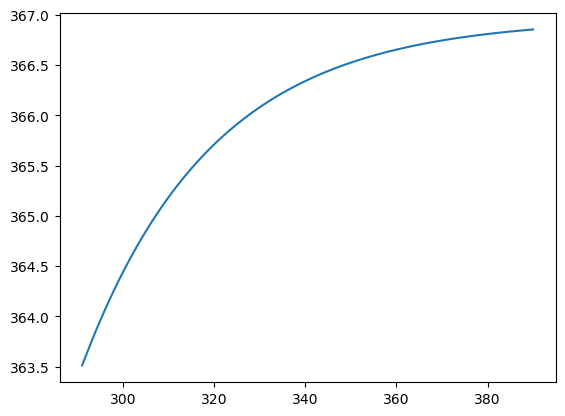

In [19]:
pyplot.plot(pred)

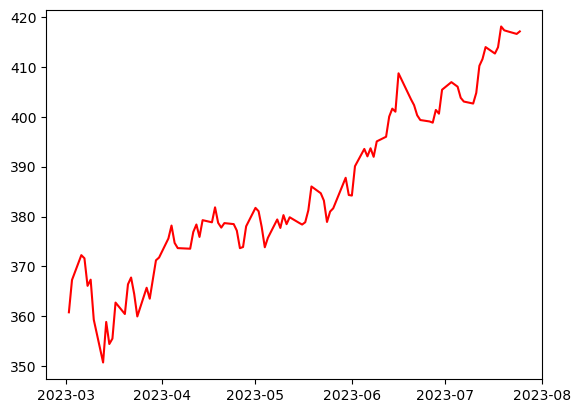

In [20]:
pyplot.plot(test_data, color='red')